In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import plot_tree, export_text
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("immo-ml-data.csv")

In [ ]:
X = df.drop(columns=["Price"])
y = df["Price"]

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
feature_names = poly.get_feature_names_out(X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=42)
model.fit(X_train, y_train)

In [ ]:
def evaluate(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    smape = 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))
    return {
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R²": r2_score(y_true, y_pred),
        "MAPE": mape,
        "sMAPE": smape,
    }

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

metrics_train = evaluate(y_train, y_train_pred)
metrics_test = evaluate(y_test, y_test_pred)

print("Model Evaluation:")
print(f"Training - RMSE: {metrics_train['RMSE']:.2f}, MAE: {metrics_train['MAE']:.2f}, R²: {metrics_train['R²']:.2f}, MAPE: {metrics_train['MAPE']:.2f}%, sMAPE: {metrics_train['sMAPE']:.2f}%")
print(f"Test - RMSE: {metrics_test['RMSE']:.2f}, MAE: {metrics_test['MAE']:.2f}, R²: {metrics_test['R²']:.2f}, MAPE: {metrics_test['MAPE']:.2f}%, sMAPE: {metrics_test['sMAPE']:.2f}%")


In [ ]:
# Visualize a tree from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], feature_names=feature_names, filled=True, fontsize=8)
plt.savefig("random_forest_tree_visual.png", dpi=300)
plt.show()

In [ ]:
# Export tree as text
tree_text = export_text(model.estimators_[0], feature_names=list(feature_names))
print("\nTree Structure:")
print(tree_text)

In [3]:
# Data
strategies = [
    "Baseline", 
    "Removed < 0.3% Importance", 
    "Removed < 1% Importance", 
    "Log Transform Price", 
    "Aggregate Garden/Terrace", 
    "Log Transform Living Area", 
    "Sqrt Transform Outdoor Area", 
    "Log Transform Outdoor Area", 
    "Price_per_Sqm (Leakage)", 
    "Region Avg Living Area", 
    "Outdoor/Indoor Ratio", 
    "Binning Bedrooms", 
    "Polynomial Features", 
    "Poly Features, No Binned Bedrooms", 
    "Gaussian Noise Augmentation", 
    "Weighted Loss", 
    "Log Transform Price (Weighted Loss)", 
    "Add Municipality", 
    "Add Avg Income per Municipality"
]

rmse_scores = [
    119698.57, 
    119681.10, 
    119843.01, 
    122009.71, 
    119334.62, 
    119267.08, 
    119183.91, 
    119187.34, 
    8473.28, 
    119234.81, 
    119589.11, 
    119178.53, 
    117981.10, 
    118007.19, 
    119116.71, 
    117884.64, 
    118399.11, 
    116049.13, 
    110102.78
]

r2_scores = [
    0.57, 
    0.57, 
    0.57, 
    0.55, 
    0.57, 
    0.57, 
    0.57, 
    0.57, 
    1.00, 
    0.57, 
    0.57, 
    0.57, 
    0.58, 
    0.58, 
    0.57, 
    0.58, 
    0.58, 
    0.59, 
    0.63
]


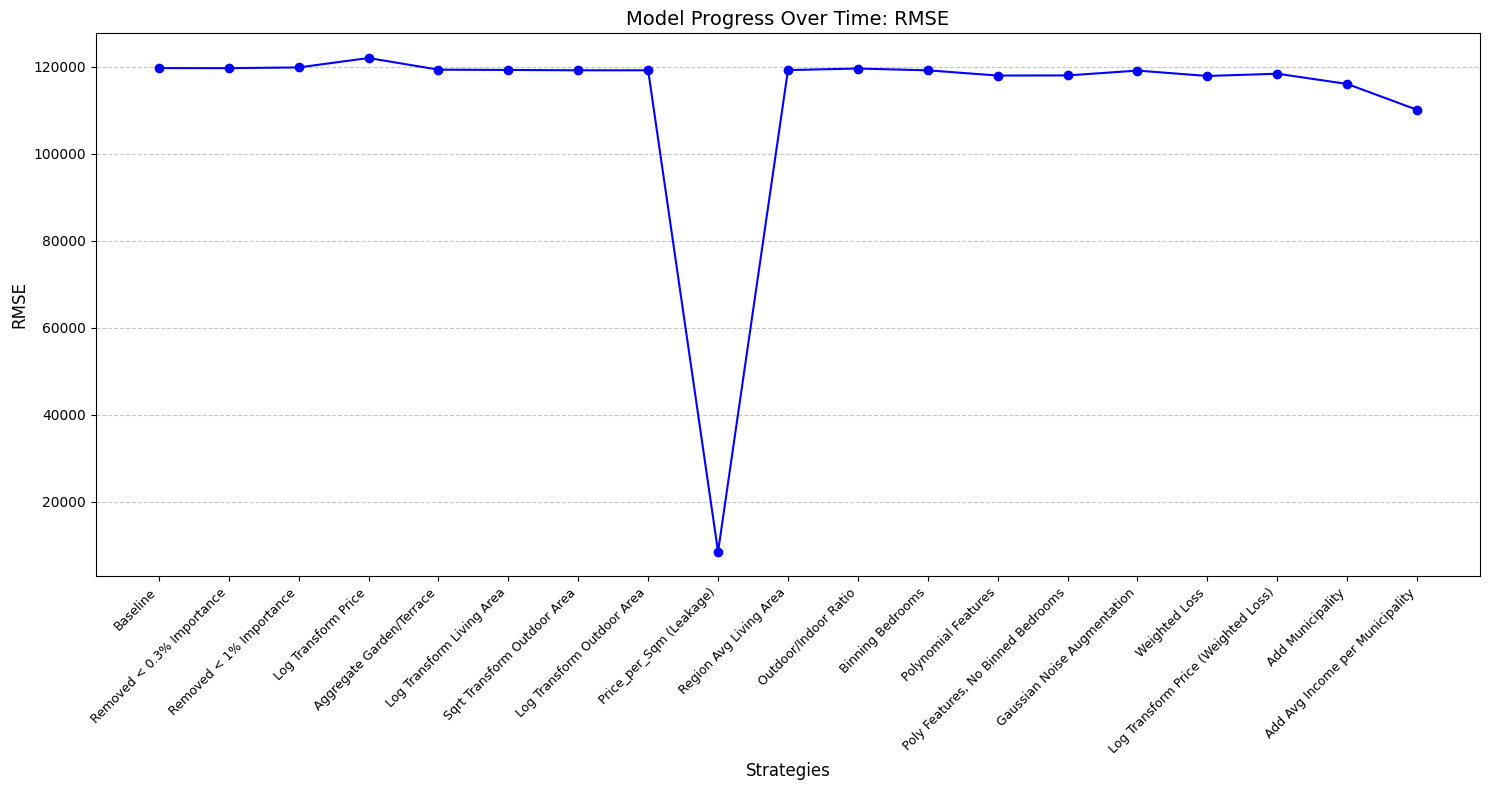

In [4]:
# RMSE Graph
plt.figure(figsize=(15, 8))
plt.plot(strategies, rmse_scores, label="RMSE", marker="o", color='blue')
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.xlabel("Strategies", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.title("Model Progress Over Time: RMSE", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("rmse_progress.png", dpi=300)

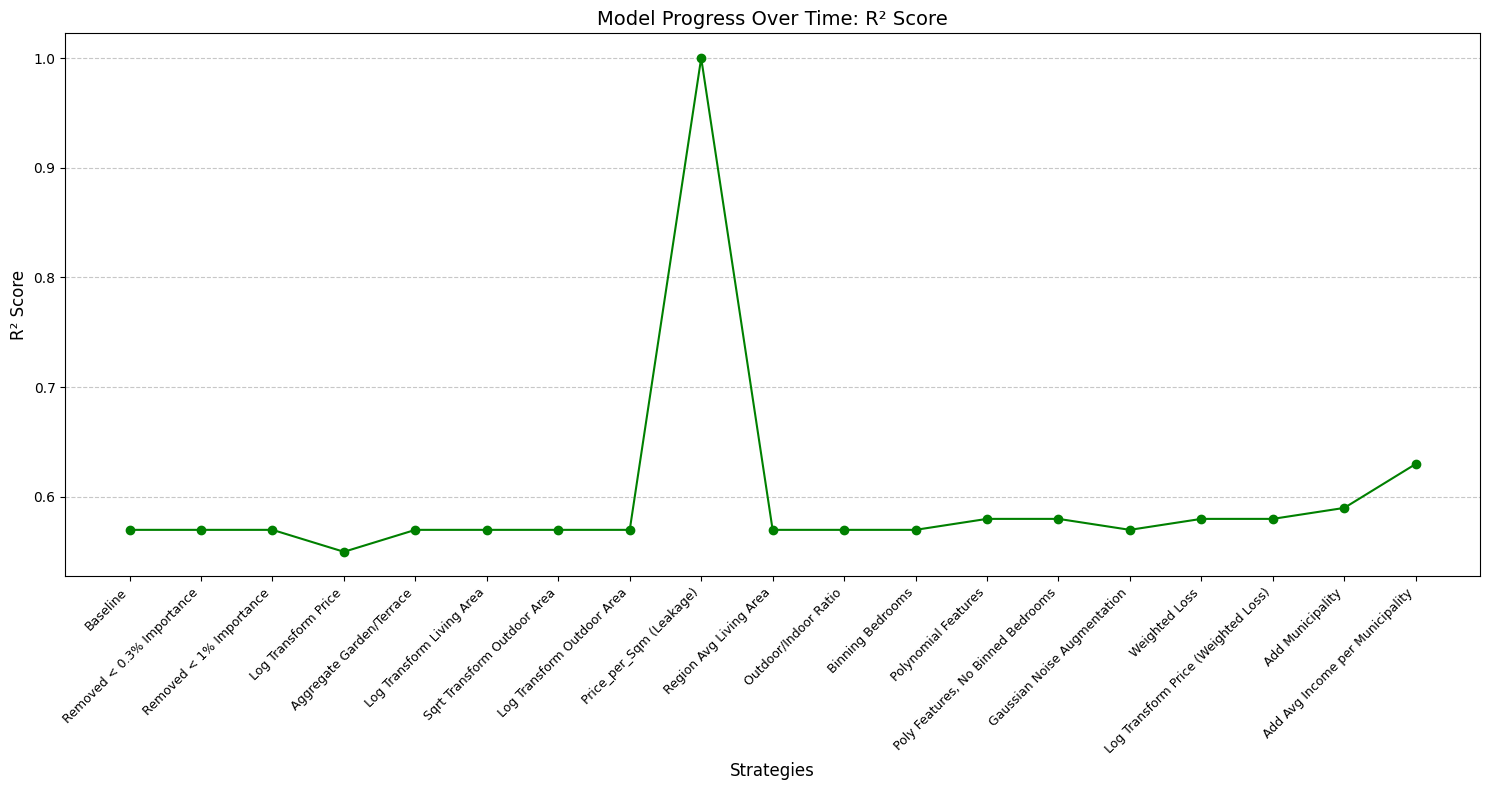

In [5]:
# R² Score Graph
plt.figure(figsize=(15, 8))
plt.plot(strategies, r2_scores, label="R² Score", marker="o", color='green')
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.xlabel("Strategies", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.title("Model Progress Over Time: R² Score", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("r2_progress.png", dpi=300)